<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


# **Basic information of the dataset**

In [2]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile('IMDb.xlsx')
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
684,2024-07-04,March or Die,Movie,6.3,107,1977,"Adventure, Drama, Romance, War",4036,1977-10-13 00:00:00,Dick Richards
685,2024-07-06,The Strangers: Chapter 1,Movie,4.7,91,2024,Horror,13363,2024-05-17 00:00:00,Renny Harlin
686,2024-07-13,Damaged,Movie,4.6,97,2024,"Action, Crime, Drama, Mystery, Thriller",4273,2024-04-11 00:00:00,Terry McDonough
687,2024-07-13,You Can't Run Forever,Movie,5.0,102,2024,"Drama, Horror, Thriller",2593,2024-05-17 00:00:00,Michelle Schumacher
688,2024-07-14,Sunday in the Country,Movie,6.2,93,1974,"Crime, Drama, Thriller",760,1974-11-22 00:00:00,John Trent


In [3]:
# Displaying the number of rows and columns in the dataset:
wl.shape

(689, 10)

In [4]:
# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         689 non-null    datetime64[ns]
 1   Title           689 non-null    object        
 2   Title Type      689 non-null    object        
 3   IMDb Rating     689 non-null    float64       
 4   Runtime (mins)  689 non-null    int64         
 5   Year            689 non-null    int64         
 6   Genres          689 non-null    object        
 7   Num Votes       689 non-null    int64         
 8   Release Date    689 non-null    object        
 9   Directors       685 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 54.0+ KB


In [5]:
# Displaying statistical data of the numerical data present in the dataset:
wl.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,689,689.000000,689.000000,689.000000,6.890000e+02
mean,2022-08-06 09:24:17.764876544,6.643396,114.287373,1989.660377,7.974858e+04
min,2020-04-29 00:00:00,0.000000,71.000000,1927.000000,0.000000e+00
25%,2021-11-01 00:00:00,6.200000,100.000000,1981.000000,4.830000e+03
50%,2022-06-19 00:00:00,6.600000,110.000000,1992.000000,2.051600e+04
75%,2023-04-04 00:00:00,7.200000,121.000000,2000.000000,6.837200e+04
max,2024-07-14 00:00:00,9.000000,317.000000,2024.000000,2.871665e+06
std,NaN,0.827237,25.374838,16.234945,2.045633e+05


# **Basic column data plotting**

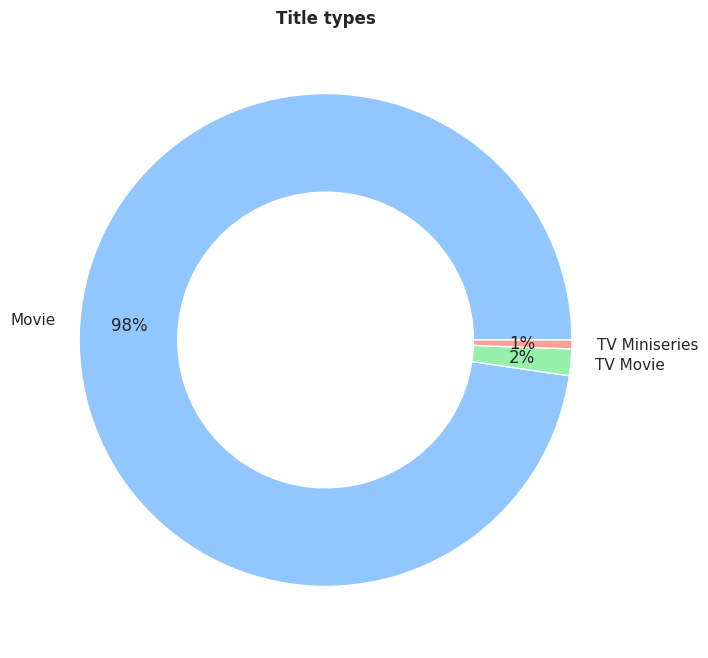

In [6]:
# Displaying the title types present in the dataset:
wl['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [7]:
# Creating a datetime object based on the dates from the dataset:
wl['Created'] = wl['Created'].map(pd.to_datetime)
wl['Day Created'] = wl['Created'].apply(lambda x : x.day)
wl['Month Created'] = wl['Created'].apply(lambda x : x.month)
wl['Year Created'] = wl['Created'].apply(lambda x : x.year)
wl['Weekday Created'] = wl['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          689 non-null    datetime64[ns]
 1   Title            689 non-null    object        
 2   Title Type       689 non-null    object        
 3   IMDb Rating      689 non-null    float64       
 4   Runtime (mins)   689 non-null    int64         
 5   Year             689 non-null    int64         
 6   Genres           689 non-null    object        
 7   Num Votes        689 non-null    int64         
 8   Release Date     689 non-null    object        
 9   Directors        685 non-null    object        
 10  Day Created      689 non-null    int64         
 11  Month Created    689 non-null    int64         
 12  Year Created     689 non-null    int64         
 13  Weekday Created  689 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

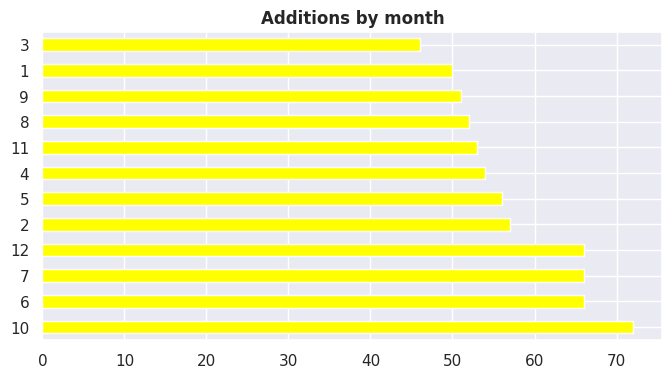

In [8]:
# Displaying the months with most and less additions:
wl['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

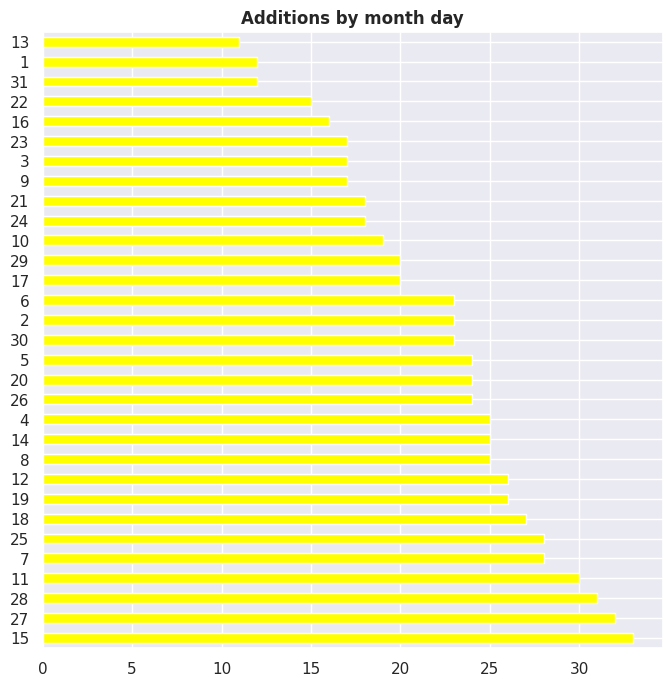

In [9]:
# Displaying the month days with most and less additions:
wl['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

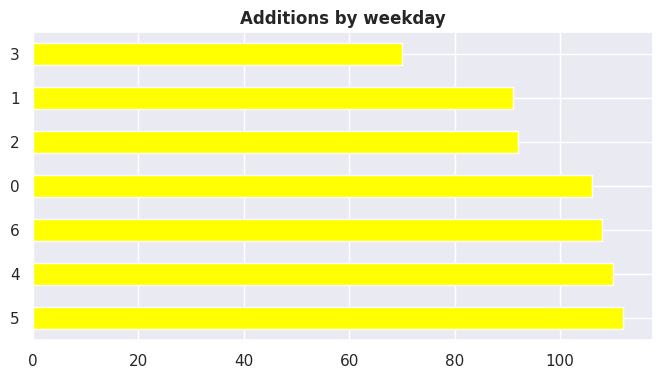

In [10]:
# Displaying the weekdays with most and less additions:
wl['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

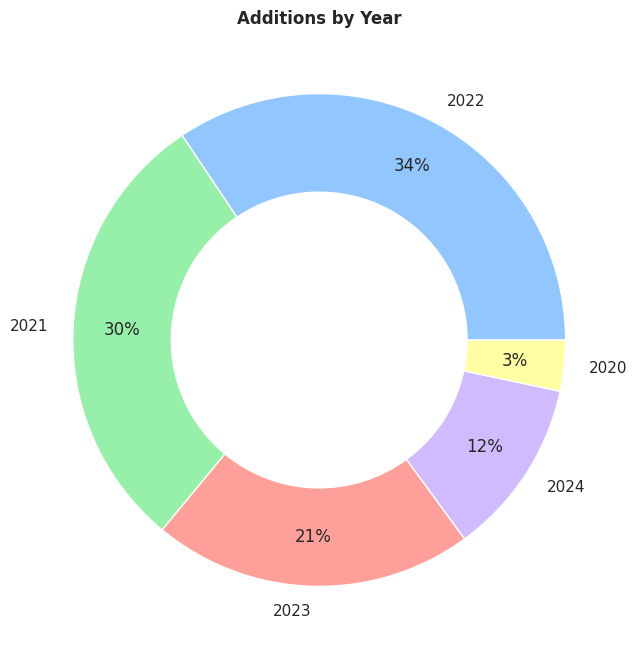

In [11]:
# Displaying the years with most and less additions:
wl['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

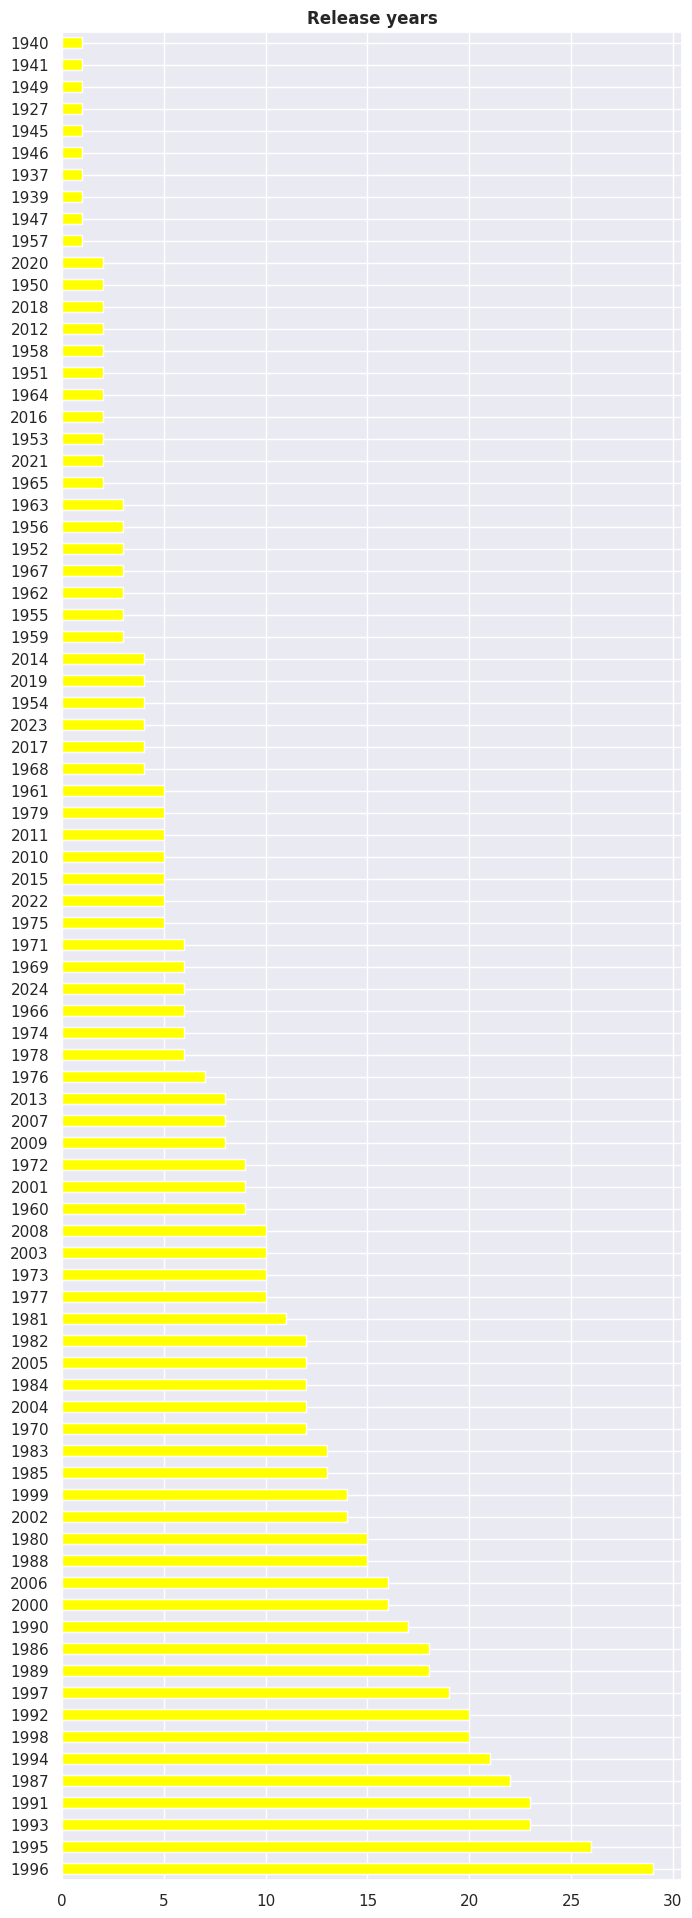

In [12]:
# Displaying distibution of release years in the dataset:
wl['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

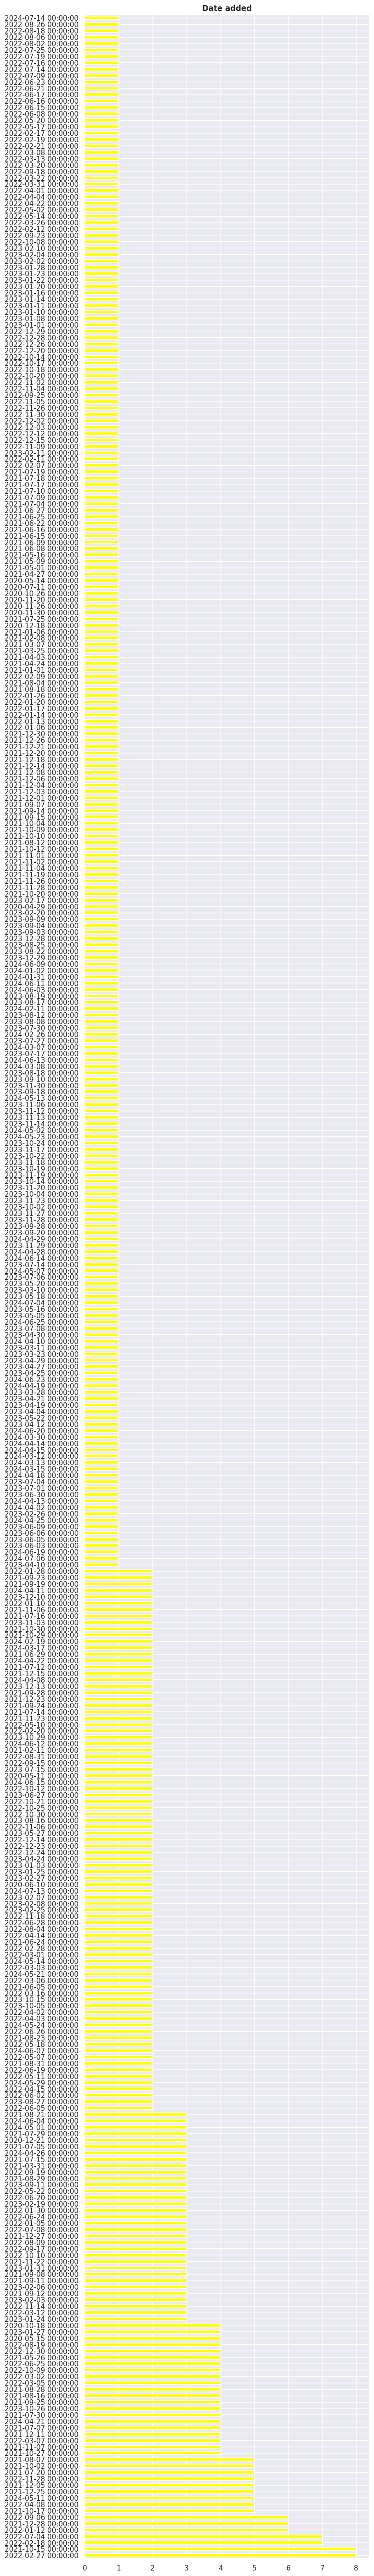

In [13]:
# Displaying distibution of dates added in the dataset:
wl['Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 72))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [14]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Decade'] = wl['Year'].apply(movies_by_decade)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s


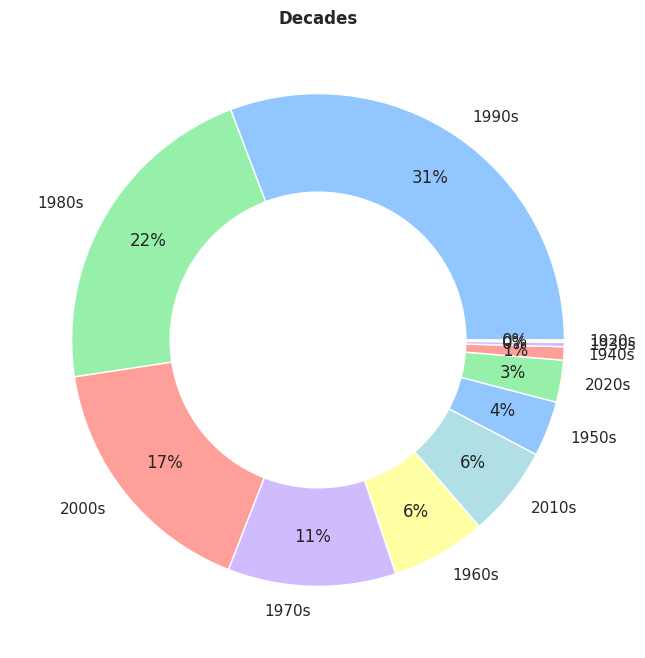

In [15]:
# Displaying the decades the movies are from:
wl['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [16]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quality'] = wl['IMDb Rating'].apply(imdb_rating)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s,Regular
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s,Okay


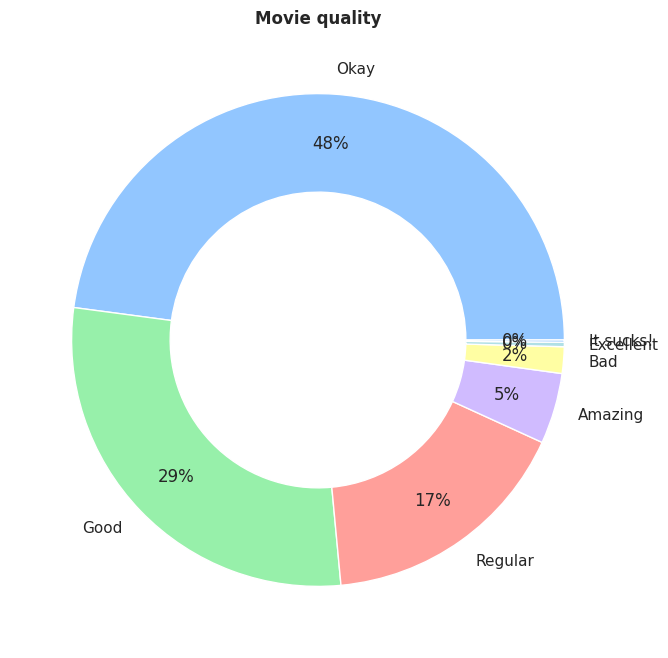

In [17]:
# Displaying the movie rating classification based on the algorithm above:
wl['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie popularity'] = wl['Num Votes'].apply(movie_popularity)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s,Regular,Less than 250k votes
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s,Okay,Less than 250k votes


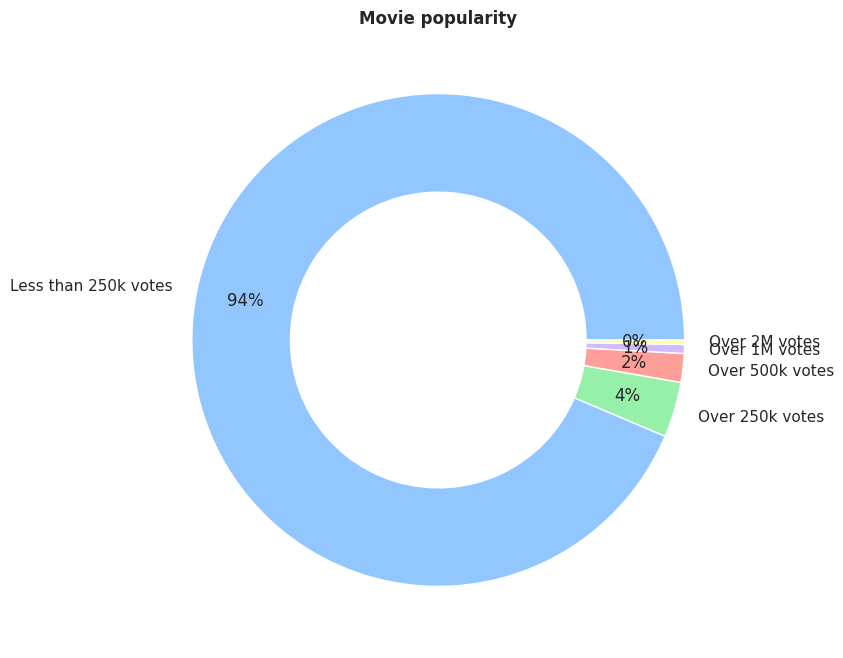

In [19]:
# Displaying the movie popularity based on the algorithm above:
wl['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Movie duration'] = wl['Runtime (mins)'].apply(movie_duration)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29


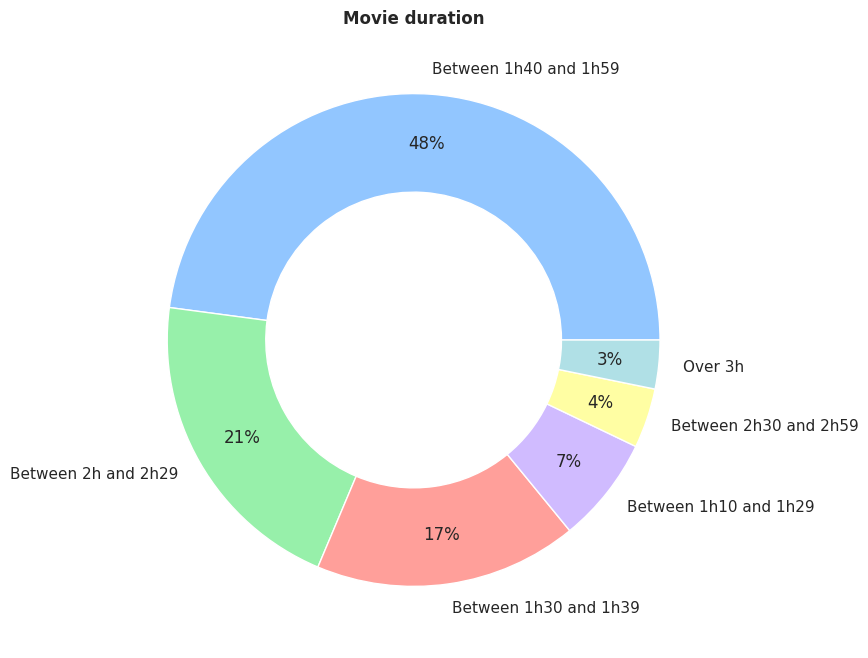

In [21]:
# Displaying the movie duration based on the algorithm above:
wl['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Quartile Added'] = wl['Month Created'].apply(year_quartile)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second


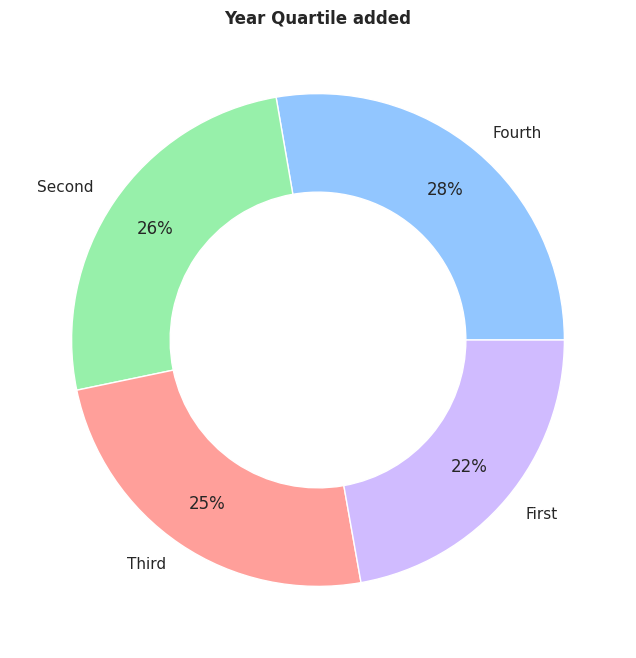

In [23]:
# Displaying the quartile the movie was added based on the algorithm above:
wl['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
wl['Month Half Added'] = wl['Day Created'].apply(month_half)
wl.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,The Great Dictator,Movie,8.4,125,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
1,2020-05-11,Flipper,Movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h30 and 1h39,Second,First
2,2020-05-11,Alaska,Movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston,11,5,2020,0,1990s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First
3,2020-05-14,Lady in the Water,Movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan,14,5,2020,3,2000s,Regular,Less than 250k votes,Between 1h40 and 1h59,Second,First
4,2020-05-15,The Rescuers Down Under,Movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy",15,5,2020,4,1990s,Okay,Less than 250k votes,Between 1h10 and 1h29,Second,First


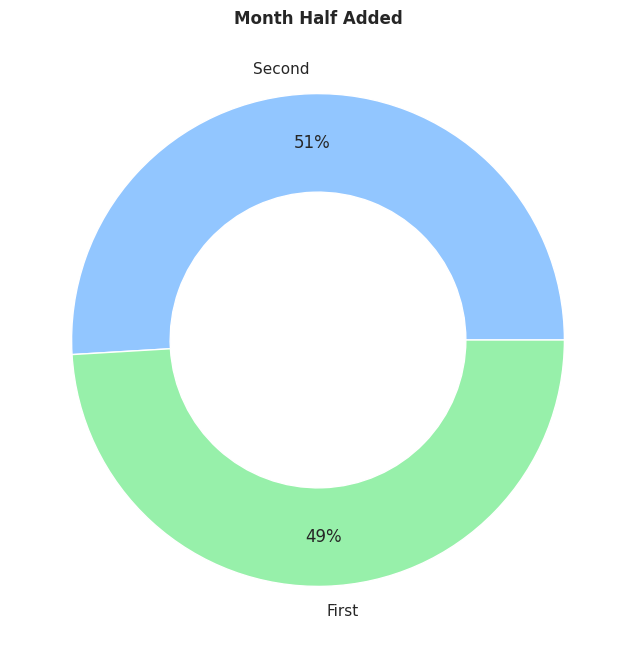

In [25]:
# Displaying the month half the movie was added based on the algorithm above:
wl['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [26]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
wl['Genres'] = wl['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = wl.index, columns = wl['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [27]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         576   113
Adventure      577   112
Animation      673    16
Biography      621    68
Comedy         464   225
Crime          553   136
Documentary    683     6
Drama          191   498
Family         616    73
Fantasy        633    56
Film-Noir      685     4
History        648    41
Horror         668    21
Music          661    28
Musical        668    21
Mystery        644    45
Romance        517   172
Sci-Fi         637    52
Sport          643    46
Thriller       555   134
War            637    52
Western        664    25


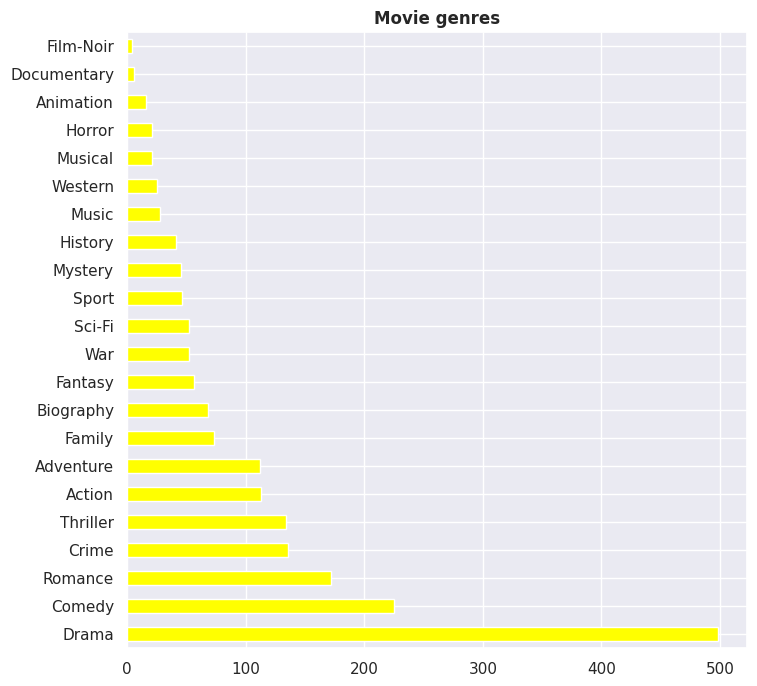

In [28]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [29]:
wl = wl[wl['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
wl = wl.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = wl.index, columns = wl['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-29-96bf50eac1cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wl['Directors'] = wl['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            683     0
Alan Parker            684     0
Alan Shapiro           684     0
Albert Band            684     0
Albert Brooks          684     0
...                    ...   ...
William Wyler          684     0
Wolfgang Petersen      684     0
Wolfgang Reitherman    682     0
Yves Simoneau          684     0
Zoltan Korda           684     1

[544 rows x 2 columns]


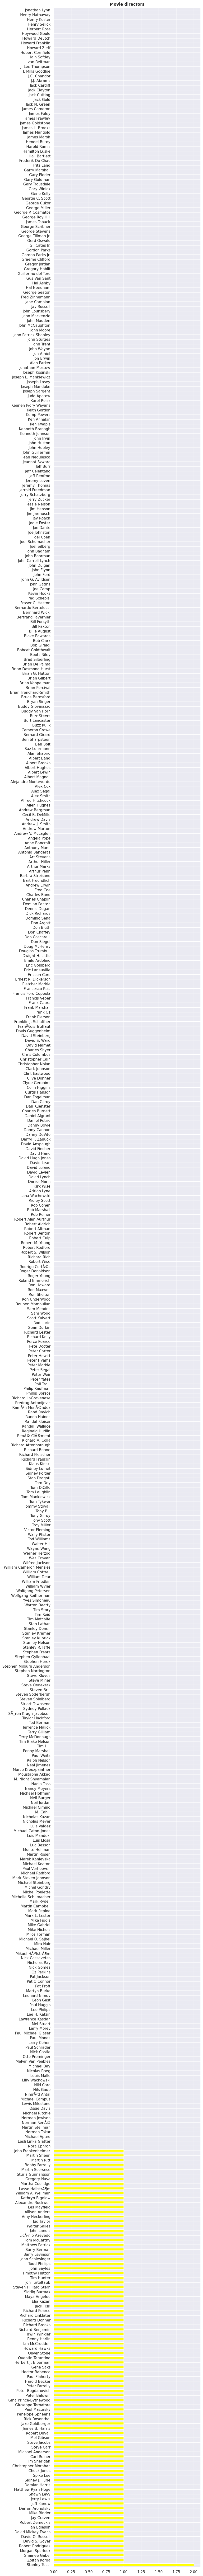

In [31]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 140))
plt.ylabel(None)
plt.title('Movie directors', fontweight = 'bold')
plt.show()